In [30]:
# necessary imports
import numpy as np
import pandas as pd

# sklearn imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# nlp related imports
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
import warnings

# plotting
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
import seaborn as sns

warnings.filterwarnings(action='ignore')

Main goal of this project is playing with words to improve prediction accuracy. So I dont care about the rest of the features other than words.

In [3]:
data = pd.read_csv("../data/train-balanced-sarcasm.csv")

# remove na if present
data.dropna(subset=['comment'], inplace = True)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(data['comment'], data['label'], test_size =  0.3, random_state = 42)

# EDA

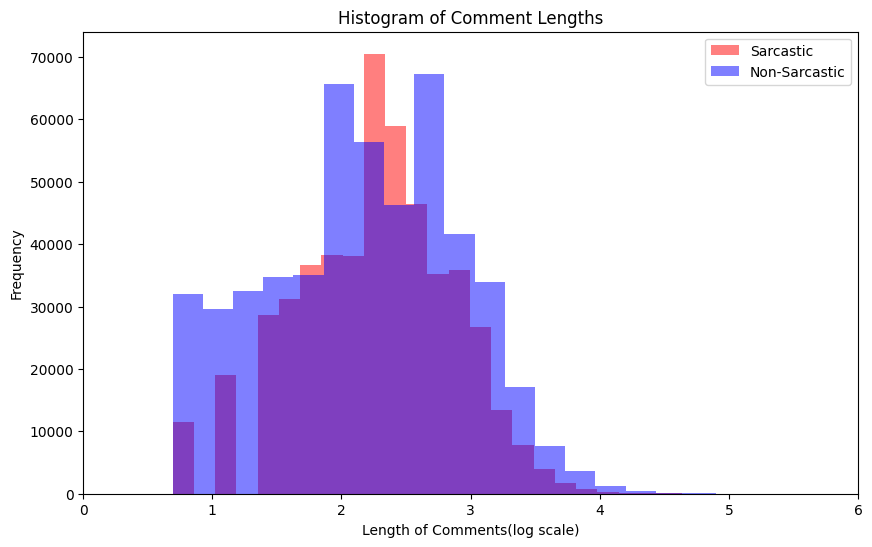

In [10]:
# plot the length of comments for sarcastic and non-sarcastic comments
data['log_length'] = data['comment'].apply(lambda x: np.log1p(len(x.split())))


plt.figure(figsize=(10,6))
plt.hist(data[data['label'] == 1]['log_length'], bins = 30, alpha = 0.5, label = 'Sarcastic', color = 'red')
plt.hist(data[data['label'] == 0]['log_length'], bins = 30, alpha = 0.5, label = 'Non-Sarcastic', color = 'blue')
plt.title('Histogram of Comment Lengths')
plt.xlabel('Length of Comments(log scale)')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0, 6)
plt.show()

Length of comment are pretthy even between the 2 classes. Hence, we do not consider using this as a new feature.

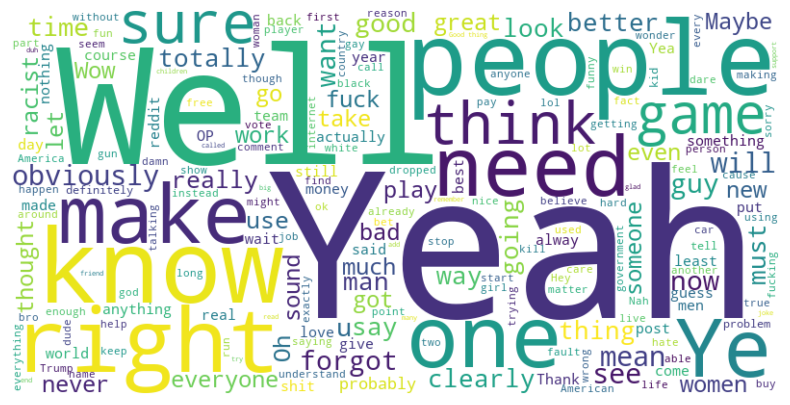

In [15]:
# generating word cloud for Sarcastic comments
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      stopwords=STOPWORDS).generate(' '.join(data[data['label'] == 1]['comment']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


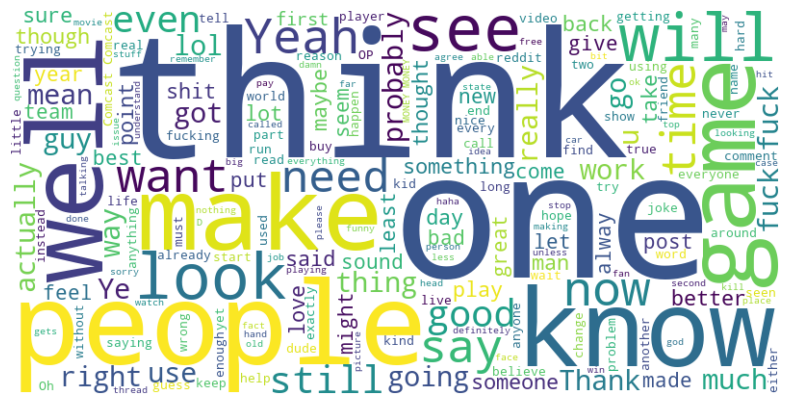

In [16]:
# generating word cloud for Normal comments
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      stopwords=STOPWORDS).generate(' '.join(data[data['label'] == 0]['comment']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Modelling

## Logistic regression with TF-IDF

TF-IDF does not captures sementic of words. It is a mere imporvement on the Bag-Of_Words(BOW) representation. Giving more weight to rare words. Common words have less weights.

\[
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \log \left( \frac{N}{1 + \text{DF}(t)} \right)
\]

In [38]:
# Using logistic regression as base line
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', 
                              ngram_range=(1, 2), # unigram and bigrams are considered
                              lowercase = True,
                              max_df=0.7,
                              min_df=5)),  
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7, min_df=5, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf', LogisticRegression(max_iter=1000, random_state=42))])

In [39]:
# Evaluate the model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confution matrix: \n {cm}')

Accuracy: 0.68
Confution matrix: 
 [[110003  41495]
 [ 54598  97136]]


Not improving too much. We will try word embedding with logit next